<a href="https://colab.research.google.com/github/Preeti-sahani/ShapeAI_Project/blob/main/Github_Repos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<h1 style="font-size:30px;color:black;text-align:center; text-decoration:underline">                   An analysis of the most popular repositories on Github</h1>
<img src="/content/github.png" width=50% height=50%>
<hr>

GitHub is a web-based version-control and collaboration platform for software developers. ... GitHub facilitates social coding by providing a web interface to the Git code repository and management tools for collaboration. GitHub can be thought of as a serious social networking site for software developers.

#**Objective of this analysis:**

Learning how to read and analyse a dataset.


To analyze top github stared, fork, repositories.

Understanding the dominant languages used for popular GitHub projects and mapping them.

Extracting the different domains of work done in these projects via the repositories tags.


#**Imporing Libraries**

In [66]:
import numpy as np 
import pandas as pd 
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt
import ast

#**Exploratory data analysis (EDA)**


**head()** - Understand your data using the head() function to look at the first few rows.

**shape()** - Review the dimensions of your data with the shape property.

**info()** - To know the information aboutvthe data.

**Dtyes** - Look at the data types for each attribute with the dtypes property.

**describe** - Review the distribution of your data with the describe() function.

**Correlation** - Calculate pairwise correlation between your variables using the corr() function.

**1. Importing Data**

In [67]:
Github_df = pd.read_csv("/content/Github_dat.zip")
Github_df.head()

,Unnamed: 0,Unnamed: 0.1,topic,name,user,star,fork,watch,issue,pull_requests,projects,topic_tag,discription_text,discription_url,commits,branches,packages,releases,contributers,License,url
0,0,0,Data-Science,keras,keras-team,47.9k,18.1k,2.1k,"2,940",87,1.0,"['deep-learning', 'tensorflow', 'neural-networ...",Deep Learning for humans,http://keras.io/,"5,342",6,0,0,49,View license,https://github.com/keras-team/keras
1,1,1,Data-Science,scikit-learn,scikit-learn,40.3k,19.6k,2.2k,"1,505",764,17.0,"['machine-learning', 'python', 'statistics', '...",scikit-learn: machine learning in Python,https://scikit-learn.org,"25,405",21,0,0,108,View license,https://github.com/scikit-learn/scikit-learn
2,2,2,Data-Science,PythonDataScienceHandbook,jakevdp,23.1k,9.9k,1.5k,65,67,0.0,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",Python Data Science Handbook: full text in Jup...,http://jakevdp.github.io/PythonDataSc…,234,5,0,0,0,View license,https://github.com/jakevdp/PythonDataScienceHa...
3,3,3,Data-Science,Probabilistic-Programming-and-Bayesian-Methods...,CamDavidsonPilon,21k,6.6k,1.4k,127,38,0.0,"['bayesian-methods', 'pymc', 'mathematical-ana...","aka ""Bayesian Methods for Hackers"": An introdu...",http://camdavidsonpilon.github.io/Pro…,"1,079",3,0,0,0,MIT,https://github.com/CamDavidsonPilon/Probabilis...
4,4,4,Data-Science,Data-Science--Cheat-Sheet,abhat222,18.4k,8.2k,1.5k,7,0,0.0,[],Cheat Sheets,NaN,363,3,0,0,0,Fetching contributors,https://github.com/abhat222/Data-Science--Chea...


In [68]:
Github_df.tail()

,Unnamed: 0,Unnamed: 0.1,topic,name,user,star,fork,watch,issue,pull_requests,projects,topic_tag,discription_text,discription_url,commits,branches,packages,releases,contributers,License,url
1495,295,95,sensor,react-native-sensor-manager,kprimice,199,53,7,19,5,0.0,[],Native sensors access for react-native,NaN,45,1,0,0,0,Fetching contributors,https://github.com/kprimice/react-native-senso...
1496,296,96,sensor,weatherstation,androidthings,199,72,31,4,0,0.0,"['android-things', 'google-cloud-pubsub']",Sensor-based peripheral sample using Android T...,NaN,64,2,0,0,0,Apache-2.0,https://github.com/androidthings/weatherstation
1497,297,97,sensor,OctoPrint-Enclosure,vitormhenrique,198,77,32,63,2,0.0,"['temperature-sensor', 'enclosure', 'raspberry...",OctoPrint Enclosure Plugin,NaN,415,3,0,0,38,GPL-3.0,https://github.com/vitormhenrique/OctoPrint-En...
1498,298,98,sensor,SensorDashboard,pocmo,197,110,25,0,0,0.0,[],A sensor dashboard for Android plotting all se...,NaN,103,2,0,0,0,Apache-2.0,https://github.com/pocmo/SensorDashboard
1499,299,99,sensor,BME680_driver,BoschSensortec,197,61,44,2,0,NaN,[],BME680 sensor driver / API including example g...,https://community.bosch-sensortec.com/t5/Bosch...,28,1,0,0,11,BSD-3-Clause,https://github.com/BoschSensortec/BME680_driver


**2. Shape of dataset**

In [69]:
Github_df.shape

(1500, 21)

**3. Info()**

In [70]:
Github_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1500 non-null   int64  
 1   Unnamed: 0.1      1500 non-null   int64  
 2   topic             1500 non-null   object 
 3   name              1500 non-null   object 
 4   user              1500 non-null   object 
 5   star              1500 non-null   object 
 6   fork              1500 non-null   object 
 7   watch             1500 non-null   object 
 8   issue             1500 non-null   object 
 9   pull_requests     1500 non-null   object 
 10  projects          1313 non-null   float64
 11  topic_tag         1500 non-null   object 
 12  discription_text  1480 non-null   object 
 13  discription_url   669 non-null    object 
 14  commits           1500 non-null   object 
 15  branches          1500 non-null   object 
 16  packages          1500 non-null   int64  


**4. Dtype**

In [71]:
Github_df_max = Github_df['star'].str.contains('k').all()
Github_df_max

False

In [72]:
Github_df['star']=Github_df['star'].str.replace('k','').astype(float)

**5. describe**

In [73]:
Github_df['star'].describe()

count    1500.000000
mean      125.963867
std       236.871510
min         1.000000
25%         2.800000
50%        13.100000
75%       108.000000
max       996.000000
Name: star, dtype: float64

**Converting number with comma numerical.**

In [74]:
Numerical_columns = ["star","fork","watch","issue","pull_requests","projects","commits","branches","packages","releases","contributers"]

In [75]:
Github_df.at[700, 'issue'] = str(5000)


In [76]:
Github_df["issue"] = Github_df["issue"].apply(lambda x: x.replace(',', '') if ',' in x else x).astype(float)
Github_df["pull_requests"] = Github_df["pull_requests"].apply(lambda x: x.replace(',', '') if ',' in x else x).astype(float)
Github_df["commits"] = Github_df["commits"].apply(lambda x: x.replace(',', '') if ',' in x else x).astype(float)
Github_df["branches"] = Github_df["branches"].apply(lambda x: x.replace(',', '') if ',' in x else x).astype(float)
Github_df["contributers"] = Github_df["contributers"].apply(lambda x: x.replace(',', '') if ',' in x else x).astype(float)

**Column Star, Fork, Watch conatains number (1.2K) format, we need to convert into (1200) format.**


In [77]:
Github_df['fork'] = Github_df['fork'].apply(lambda x: float(x.replace('k',''))*1000 if 'k' in x else x)
Github_df['watch'] = Github_df['watch'].apply(lambda x: float(x.replace('k',''))*1000 if 'k' in x else x)

Github_df.head()

,Unnamed: 0,Unnamed: 0.1,topic,name,user,star,fork,watch,issue,pull_requests,projects,topic_tag,discription_text,discription_url,commits,branches,packages,releases,contributers,License,url
0,0,0,Data-Science,keras,keras-team,47.9,18100,2100,2940.0,87.0,1.0,"['deep-learning', 'tensorflow', 'neural-networ...",Deep Learning for humans,http://keras.io/,5342.0,6.0,0,0,49.0,View license,https://github.com/keras-team/keras
1,1,1,Data-Science,scikit-learn,scikit-learn,40.3,19600,2200,1505.0,764.0,17.0,"['machine-learning', 'python', 'statistics', '...",scikit-learn: machine learning in Python,https://scikit-learn.org,25405.0,21.0,0,0,108.0,View license,https://github.com/scikit-learn/scikit-learn
2,2,2,Data-Science,PythonDataScienceHandbook,jakevdp,23.1,9900,1500,65.0,67.0,0.0,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",Python Data Science Handbook: full text in Jup...,http://jakevdp.github.io/PythonDataSc…,234.0,5.0,0,0,0.0,View license,https://github.com/jakevdp/PythonDataScienceHa...
3,3,3,Data-Science,Probabilistic-Programming-and-Bayesian-Methods...,CamDavidsonPilon,21.0,6600,1400,127.0,38.0,0.0,"['bayesian-methods', 'pymc', 'mathematical-ana...","aka ""Bayesian Methods for Hackers"": An introdu...",http://camdavidsonpilon.github.io/Pro…,1079.0,3.0,0,0,0.0,MIT,https://github.com/CamDavidsonPilon/Probabilis...
4,4,4,Data-Science,Data-Science--Cheat-Sheet,abhat222,18.4,8200,1500,7.0,0.0,0.0,[],Cheat Sheets,NaN,363.0,3.0,0,0,0.0,Fetching contributors,https://github.com/abhat222/Data-Science--Chea...


In [78]:
Github_df.tail()

,Unnamed: 0,Unnamed: 0.1,topic,name,user,star,fork,watch,issue,pull_requests,projects,topic_tag,discription_text,discription_url,commits,branches,packages,releases,contributers,License,url
1495,295,95,sensor,react-native-sensor-manager,kprimice,199.0,53,7,19.0,5.0,0.0,[],Native sensors access for react-native,NaN,45.0,1.0,0,0,0.0,Fetching contributors,https://github.com/kprimice/react-native-senso...
1496,296,96,sensor,weatherstation,androidthings,199.0,72,31,4.0,0.0,0.0,"['android-things', 'google-cloud-pubsub']",Sensor-based peripheral sample using Android T...,NaN,64.0,2.0,0,0,0.0,Apache-2.0,https://github.com/androidthings/weatherstation
1497,297,97,sensor,OctoPrint-Enclosure,vitormhenrique,198.0,77,32,63.0,2.0,0.0,"['temperature-sensor', 'enclosure', 'raspberry...",OctoPrint Enclosure Plugin,NaN,415.0,3.0,0,0,38.0,GPL-3.0,https://github.com/vitormhenrique/OctoPrint-En...
1498,298,98,sensor,SensorDashboard,pocmo,197.0,110,25,0.0,0.0,0.0,[],A sensor dashboard for Android plotting all se...,NaN,103.0,2.0,0,0,0.0,Apache-2.0,https://github.com/pocmo/SensorDashboard
1499,299,99,sensor,BME680_driver,BoschSensortec,197.0,61,44,2.0,0.0,NaN,[],BME680 sensor driver / API including example g...,https://community.bosch-sensortec.com/t5/Bosch...,28.0,1.0,0,0,11.0,BSD-3-Clause,https://github.com/BoschSensortec/BME680_driver


**6. Handling Missing Values**

In [79]:
Github_df.isnull().sum()

Unnamed: 0            0
Unnamed: 0.1          0
topic                 0
name                  0
user                  0
star                  0
fork                  0
watch                 0
issue                 0
pull_requests         0
projects            187
topic_tag             0
discription_text     20
discription_url     831
commits               0
branches              0
packages              0
releases              0
contributers          0
License               0
url                   0
dtype: int64

**Visualizing the null values for each attribute**

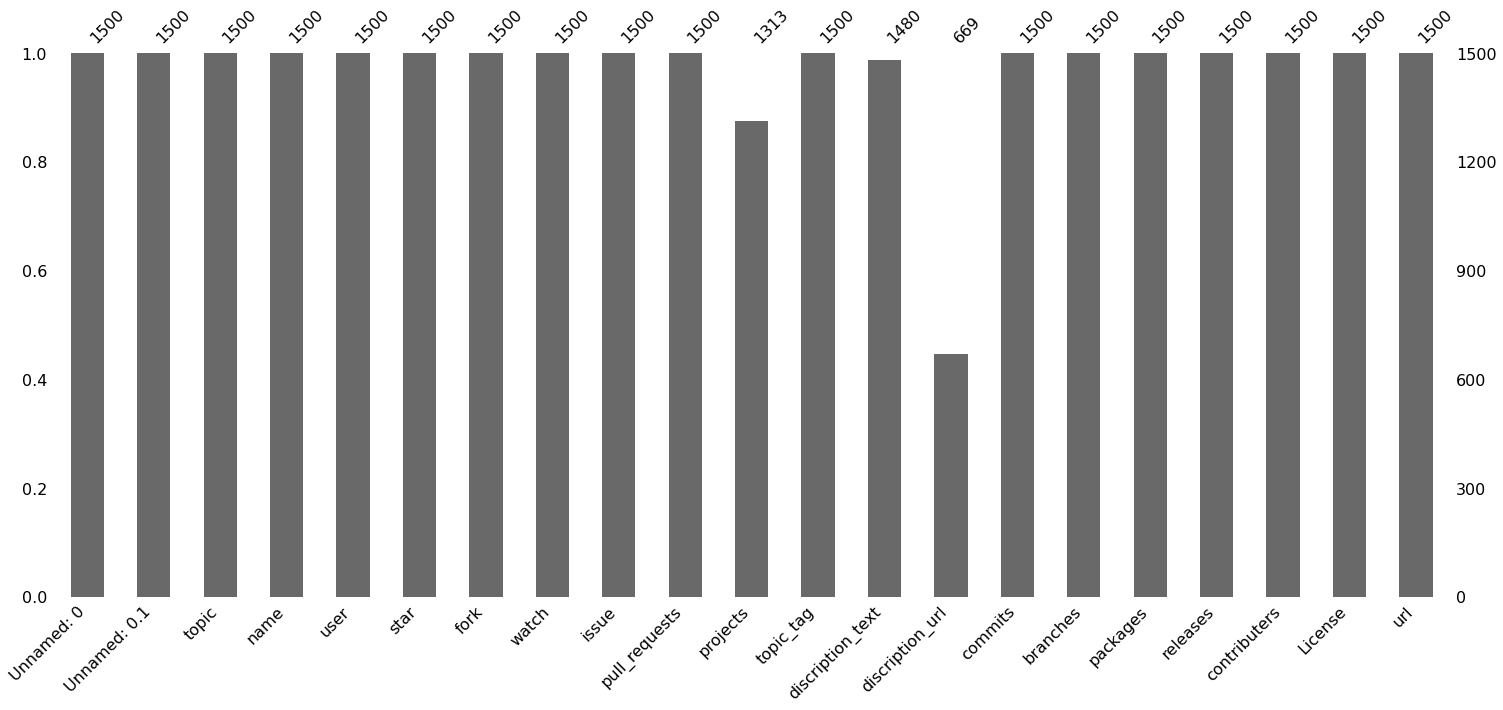

In [80]:
import missingno as msno

msno.bar(Github_df)
plt.show()


filling a null values using fillna() 

ffill means forwadrd fill   (  non-null values forward)

In [81]:
Github_df["projects"].fillna(method='ffill', inplace = True)
Github_df["discription_url"].fillna(method='ffill', inplace = True)
Github_df["discription_text"].fillna(method='ffill', inplace = True)

In [82]:
Github_df.isnull().sum()

Unnamed: 0          0
Unnamed: 0.1        0
topic               0
name                0
user                0
star                0
fork                0
watch               0
issue               0
pull_requests       0
projects            0
topic_tag           0
discription_text    0
discription_url     0
commits             0
branches            0
packages            0
releases            0
contributers        0
License             0
url                 0
dtype: int64

**Processing on column topic_tag**

In [83]:
unique_tags = []
Github_df['topic_tag'].apply(lambda x: unique_tags.append(ast.literal_eval(x)))

all_tag = np.array([item for sublist in unique_tags for item in sublist])
unique, counts = np.unique(all_tag, return_counts=True)
print("Total number of tags in 1500 repository : ",len(all_tag))
print("Total number of unique tags in 1500 repository : ",len(unique))

tag_df = pd.DataFrame({"unique":unique,"counts":counts})
tag_df = tag_df.sort_values(['counts'],ascending=[False])

Total number of tags in 1500 repository :  8729
Total number of unique tags in 1500 repository :  3288


In [84]:
fig = px.bar(tag_df[:100],x="unique",y="counts",color='counts')
fig.show()

#**Repository Distributions Analysis**

**1. Repository Fork distribution:**

In [85]:
Github_df['fork'] = Github_df['fork'].astype(float)
fork_topicwise = Github_df.groupby('topic').sum()['fork']
fig = px.bar(fork_topicwise,x=fork_topicwise.index,y="fork",color=fork_topicwise.index)
fig.show()

**We can see above Android-studio, Open-CV, sensor & Raspberry pi tags have  minimum or less forks.**

**2. Repository star distribution topic wise:**

In [86]:
Github_df['star'] = Github_df['star'].astype(float)
star_topicwise = Github_df.groupby('topic').sum()['star']
fig = px.bar(star_topicwise,x=star_topicwise.index,y="star",color=star_topicwise.index)
fig.show()

We can see here Arduino, Raspberry pi & sensor topic has most stared repository (total 30k+).

Also we know that machine-learning is most usable tags rather then machine-learning repository are not stared as much as java-script and java.

Data-Science, Computer-Vision, awesome, machine-Learning are those topics which accumulated sum are very low.

Data-science,computer-vision is most hot topic these days but data-science repositerys are not as much stared compared to other topics.

**3. Repository watch distribution:**



In [87]:
Github_df['watch'] = Github_df['watch'].astype(float)
watch_topicwise = Github_df.groupby('topic').sum()['watch']
fig = px.bar(watch_topicwise,x = watch_topicwise.index, y ="watch", color = watch_topicwise.index)
fig.show()

**We can see same similarity in topic-wise here like star and fork.**


**4. Issue Distribution**

In [88]:
Github_df['issue'] = Github_df['issue']
issue_topicwise = Github_df.groupby('topic').sum()['issue']
fig = px.pie(issue_topicwise, values ='issue', names = issue_topicwise.index, title ='Issue Distribution topic wise')
fig.show()

Javascript has most of the issues with 27% as compare to others tags.

**5. Commit Distribution topic wise:**


In [89]:
commit_topicwise = Github_df.groupby('topic').sum()['commits']
fig = px.pie(commit_topicwise, values ='commits', names = commit_topicwise.index, title ='Commit Distribution topic wise')
fig.show()

Defenetly Raspberry-pi topic have less star and forks but it wins in commits with almost 24%.

**6. Pull requests Distribution;**

In [90]:
Github_df['pull_requests'] = Github_df['pull_requests'].astype(float)
pull_req_topicwise = Github_df.groupby('topic').sum()['pull_requests']
fig = px.pie(pull_req_topicwise, values ='pull_requests', names = pull_req_topicwise.index, title ='Pull requests Distribution topic wise')
fig.show()

**Here javascript has more pull requests with 25% of over all chart, this means that users are much more interste in javascript as compare to other programming tags. 
After that users make requests on machine larning with 22% of a chart.**


**7. Contributors Distribution :**

In [91]:
contributers_topicwise = Github_df.groupby('topic').sum()['contributers']
fig = go.Figure(data=[go.Pie(labels=contributers_topicwise.index, values=contributers_topicwise.values, hole=.3)])
fig.show()

**Java-Script again win the game Data-Science and c++ topics are came forward. they are not at 2nd and 3rd place in star and fork repository.**

**8. License distribution :**

In [92]:
License_distribution = Github_df["License"].apply(lambda x: x if'\n' not in x else None).value_counts()
fig = px.bar(y=License_distribution.values, x=License_distribution.index)
fig.show()

#**Top 10 repository analysis topic wise:**


**Classifying repositories according to the popularity.**

In [93]:
classified_repos=[]
for i in range(8,300,7):
    x = Github_df[(Github_df['star'] >= i) & (Github_df['star'] <(i+7.0))]
    classified_repos.append(len(x))

In [94]:
indexes = []

for i in range (8000,300000, 7000):
    x = '[' + str(i) +','+ (str(i+7000)) + ')'
    indexes.append(x)

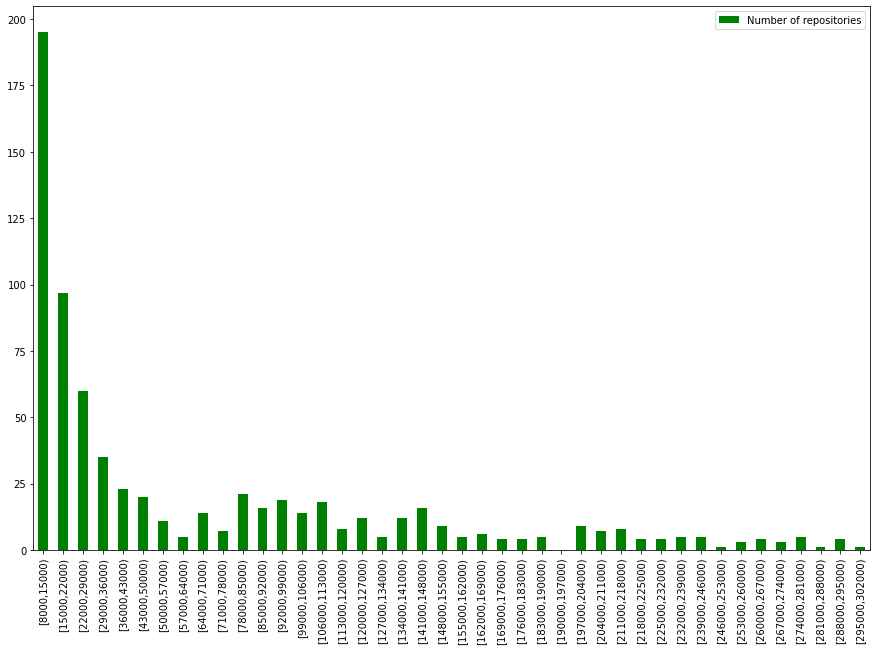

In [95]:
divided_repos = pd.Series(data=classified_repos, index=indexes)
divided_repos.plot(kind='bar', figsize=(15,10), color=['green'],legend=True, label='Number of repositories')

**2. Popular Languages**

Determining the popularity of a language based on the name of repositories using it.


In [96]:
%matplotlib inline
topics_df = Github_df['topic'].value_counts()
topics_df.head(15)

Raspberry pi           100
machine-Learning       100
Open-CV                100
javascript             100
Computer-Vision        100
variational-encoder    100
Arduino                100
sensor                 100
Data-Science           100
awesome                100
flutter                100
Android-studio         100
GAN                    100
c++                    100
java                   100
Name: topic, dtype: int64

<Figure size 1080x288 with 0 Axes>

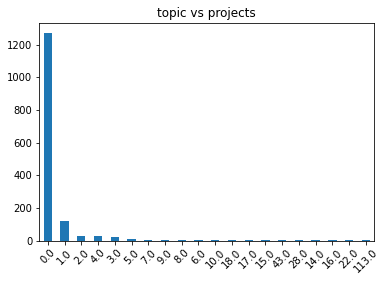

In [97]:
plt.figure(figsize = (15,4))
plt.figure()
pd.Series(Github_df["projects"]).value_counts().plot(kind='bar')
plt.title('topic vs projects')
plt.xticks(rotation = 45);

Here, all the repositories of different topic have 100  topic_tage that is number of repository for each topic is 100.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



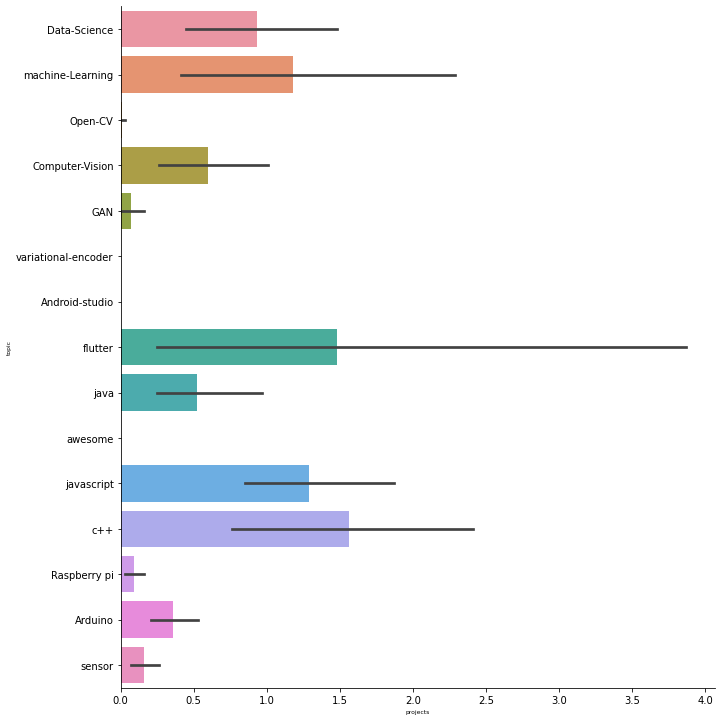

In [104]:
X = sns.factorplot(x = "projects", y="topic", data = Github_df, size=10, kind="bar")
X.set_xlabels("projects", fontsize = 6)
X.set_ylabels("topic", fontsize = 6)

**1.stars**

In [99]:
github_group = Github_df.groupby('topic')
num_of_top_repository = 10
fig = go.Figure()
for name, group in github_group:
    
    fig.add_trace(go.Bar(
    x=list(range(1,num_of_top_repository+1)),
    y=group["star"].values[:num_of_top_repository+1],
    name=name,
    ))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

**Java-script repository havs more stars then other repository in tpo 10 repositories.**

**2. Fork**


In [100]:
github_group = Github_df.groupby('topic')
num_of_top_repository = 10
fig = go.Figure()
for name, group in github_group:
    
    fig.add_trace(go.Bar(
    x=list(range(1,num_of_top_repository+1)),
    y=group["fork"].values[:num_of_top_repository+1],
    name=name,
    ))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

**Machine-learning repositories are more forked then java-scriped repositories rether then java-script repositories are more stared.**


In [101]:
github_group = Github_df.groupby('topic')
num_of_top_repository = 10
fig = go.Figure()
for name, group in github_group:
    
    fig.add_trace(go.Bar(
    x=list(range(1,num_of_top_repository+1)),
    y=group["contributers"].values[:num_of_top_repository+1],
    name=name,
    ))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

**Here we can see some different senerio
more stared repositories have less contributers**

#**Correlation**

**We can see same similarity in topic-wise here like star and fork.**


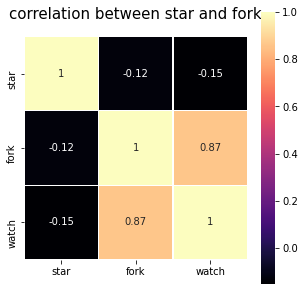

In [102]:
colormap = plt.cm.magma
plt.figure(figsize=(5,5))
plt.title('correlation between star and fork', y=1.05, size=15)
sns.heatmap(Github_df[['star','fork','watch']].corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

star and watch are more correlatd (0.9)
star and fork is less correlated compare to other two,

**(Star & watch) > (Fork & watch) > (star > fork)**



**All numeric columns correlation:**


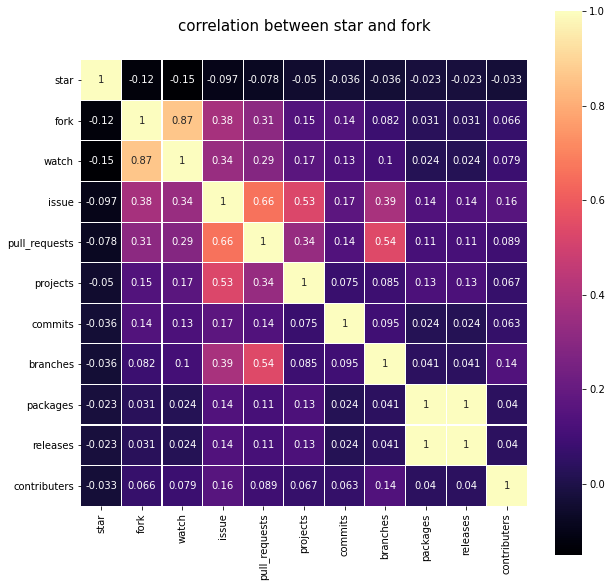

In [103]:
Numerical_columns = ["star","fork","watch","issue","pull_requests","projects","commits","branches","packages","releases","contributers"]
plt.figure(figsize=(10,10))
plt.title('correlation between star and fork', y=1.05, size=15)
sns.heatmap(Github_df[Numerical_columns].corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

**There are many columns are not correlated**


#**4. Conclusion**

Inferences from the analysis:

The most popular repository on GitHub is freeCodeCamp, with 290,000 stars
In the top 8 repositories in the dataset, 3 are instructional and educational
JavaScript is the most popularly used language, and constitutes 38.5 % of the total languages in these repositories.

Frameworks are the most popular type of projects across GitHub.

In domains, Web Development is the most popular domain of work, followed by Mobile (android, iOS, macOS, Windows) development.

There is no determinable correlation between the number of tags and the number of stars. The correlation coefficient is a weak 0.04646.